<h1 align=center> Statistical Inference and Estimation of Mean</h1> 
<h2 align=center>Section 4, Part-1 </h2> 
<h3 align=center>Surya Lamichhane </h3> 


---
<h2> Learning Objectives </h2>

After of completion of this lesson you will be able to understand and apply:

- Point estimation
- Confidence intervals
- Hypothesis testing
- Diagnostic Tests
- Practical Examples in R
---

# 1. Introduction to Statistical Inference
Statistical inference involves drawing conclusions about a population based data from a sample. It allows us to estimate population parameters and test hypothesis using sample statistics. The method of inference consists of two main parts:

- Estimation: Estimating population parameters (e.g., mean, proportion) using sample statistics.
- Hypothesis Testing: Testing assumptions or claims about population parameters.

R is a powerful tool for performing statistical inference, offering a wide range of functions and packages.

---

## 1.1. Population VS Sample: Parameters and Statistics
Population Data refers to the complete set of individuals, objects, or species relevant to a particular analysis. The primary objective of statistical studies is to analyze population data. However, examining an entire population is often impractical or impossible. To address this, a smaller, representative subset called a sample is collected, and conclusions about the population are drawn from it.

---
### Parameter vs. Statistic
**Parameter:**  A parameter is a numerical value that describes a characteristic of an entire population. Since the full population is typically inaccessible, the parameter is considered unknown but fixed. It provides a summary measure of the population. Examples of parameters include:
- Population mean ($\mu$)
- Population proportion (p)
- Population standard deviation ($\sigma$)
---
**Statistic**: A statistic is a numerical value that characterizes a sample. Since it is derived from a specific sample, its value is known, but it varies across different samples. Examples of statistics include:

- Sample mean ( $\bar{X}$)
- Sample proportion ($\hat{p}$)
- Sample standard deviation (s)
---
**Motivational Example**: 

>- Population Data:The actual weight of all 200-grams potato chip bags produced by Frito-Lay. Since it is impractical to measure the weight of every bag, the full population data remains unknown.
>- Parameter: The mean weight of all produced bags, which is unknown but fixed.
>- Sample: The weights of a randomly selected 200 bags from the production line.
>- Statistic: The mean weight of the 200 sampled bags. Since this value is derived from a sample, it is known but varies across different samples. This sample mean serves as the best point estimate of the actual population mean.
>- Estimation: Our goal is to estimate the true mean weight of all produced bags using the sample data.
>- Hypothesis Testing: We aim to test whether the company's claim that each bag weighs 200 grams is statistically significant or not.
---

In [62]:
# Set seed for reproducibility
set.seed(123)
# Generate five samples of size 10 from a normal distribution with mean = 200 and sd = 10
samplesOf10 <- sapply(1:5, function(x) rnorm(10, mean = 200, sd = 10))

# Assign column names to identify each sample
colnames(samplesOf10) <- paste0("Sample", 1:5)

# Compute the mean of each sample
sample_mean <- apply(samplesOf10, 2, mean)

# Print the generated samples
print("Generated Samples:")
print(samplesOf10)

# Print the computed sample means
print("Mean of each sample (size 10):")
print(sample_mean)
                   

[1] "Generated Samples:"
       Sample1  Sample2  Sample3  Sample4  Sample5
 [1,] 194.3952 212.2408 189.3218 204.2646 193.0529
 [2,] 197.6982 203.5981 197.8203 197.0493 197.9208
 [3,] 215.5871 204.0077 189.7400 208.9513 187.3460
 [4,] 200.7051 201.1068 192.7111 208.7813 221.6896
 [5,] 201.2929 194.4416 193.7496 208.2158 212.0796
 [6,] 217.1506 217.8691 183.1331 206.8864 188.7689
 [7,] 204.6092 204.9785 208.3779 205.5392 195.9712
 [8,] 187.3494 180.3338 201.5337 199.3809 195.3334
 [9,] 193.1315 207.0136 188.6186 196.9404 207.7997
[10,] 195.5434 195.2721 212.5381 196.1953 199.1663
[1] "Mean of each sample (size 10):"
 Sample1  Sample2  Sample3  Sample4  Sample5 
200.7463 202.0862 195.7544 203.2204 199.9128 


**Observation in the example**: In the five samples of size 10 generated above, the sample means have been computed. It is observed that the sample means vary across different samples.

---

## 1.2. Sampling Distribution and Inference
Since collecting data from an entire population is often impractical, we rely on samples to infer and describe population characteristics using the available sample data. A large number of different samples of the same size can be drawn from a population, each producing its own sample statistic. This results in a collection of sample statistics.

**Sampling distribution**: The collection of all possible sample statistics is called the **sampling distribution**.
  
**Key Points on Sampling and Inference**: 
- In practice, we typically have only one sample and thus one sample statistic to work with.
- The estimation process is developed based on the sampling distribution and the observed sample statistic.


**Sampling Distribution of mean**:  The distribution of sample mean ($\bar{𝑥}$) obtained from all possible samples of same size drawn from population data. 

**Key points:** 
- Point estimator: The sample mean ($\bar{𝑥}$) is the best point estimate of the population mean ($\mu$)
- Mean of the sampling distribution of $\bar{𝑥}$ is equal to population mean, i.e. $E[\bar{x}] = \mu$. 
- Standard deviation  of the sampling distribution of $\bar{𝑥}$   is given by $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$ (called standard error SE)
---

## 1.3. Law of Large Number
**Definition**: As the size of a sample increases, the sample statistic gets closer to the true population parameter . 
This principle explains why larger samples provide more reliable estimates of population characteristics.

**There are two key interpretations of LLN:**
- Large Samples Improve Accuracy:
As the sample size increases, the sample mean stabilizes and converges to the population mean.
- Consistency in Long-Run Averages:
Repeated experiments or observations yield results that are closer to the expected value over time. (as the number of samples increases sample statistic  approaches actual value)
---

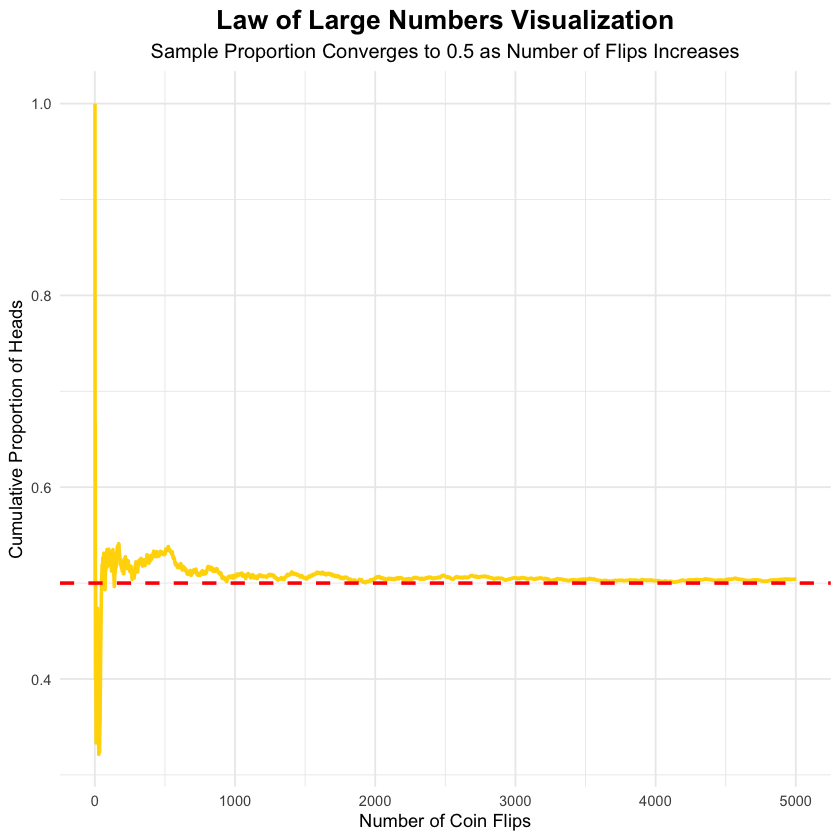

In [63]:
# Load necessary library
library(ggplot2)

# Set seed for reproducibility
set.seed(123)

# Define the number of trials (coin flips)
n_flips <- 5000  # You can increase this to see a stronger effect

# Simulate fair coin flips (1 = Heads, 0 = Tails)
flips <- sample(c(0, 1), size = n_flips, replace = TRUE, prob = c(0.5, 0.5))

# Compute cumulative mean at each step
cumulative_mean <- cumsum(flips) / (1:n_flips)

# Create a data frame for visualization
data <- data.frame(
  Trials = 1:n_flips,
  CumulativeMean = cumulative_mean
)

# Plot the cumulative mean to show convergence to 0.5
ggplot(data, aes(x = Trials, y = CumulativeMean)) +
  geom_line(color = "gold", size = 1) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "red", size = 1) +
  labs(title = "Law of Large Numbers Visualization",
       subtitle = "Sample Proportion Converges to 0.5 as Number of Flips Increases",
       x = "Number of Coin Flips",
       y = "Cumulative Proportion of Heads") +
  theme_minimal()+
theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 12)
  )

The above figure shows how the sample proportion of heads converges to the theoretical probability (0.5) as the number of flips increases.

---

## 1.4. Biased and Unbiased estimator
An estimator is unbiased if their sampling distribution centred around the parameter. 
- Sample mean ($\bar{𝑥}$ ) is an unbiased estimator of population mean $\mu$, i.e. $E[\bar{x}] = \mu$.
- Sample variance ($𝑠^2$) is an unbiased estimator of population variance $\sigma^2$, i.e. $E[s^2] = \sigma^2$.
- Sample proportion ($\hat{𝑝}$)  is an unbiased estimator of population proportion p, i.e. $E[\hat{p}] = p$.

Biased Estimator:
- Sample Median  
- Sample Standard Deviation
- Sample Range
---

## 1.5. Central Limit Theorem (CLT)

Central Limit Theorem (CLT) for Mean describes shape of the sampling distribution of sample mean ($\bar{𝑥}$) in two different scenarios. 
For any data values: $𝑋_1, 𝑋_2,\dots ,𝑋_𝑛$ are from a distribution with mean = 𝜇, and standard deviation = $\sigma$.

Two Cases Where CLT Applies: Normal or Big
- Case 1: Data values from normal population (regardless of sample size)
- Case 2: Not from normal, but sample size is big: n>30 (a common rule of thumb) (regardless of Normal Distribution)
- The sampling distribution of the sample mean ($\bar{𝑥}$) follows a normal distribution with
    - Mean: $\mu_{\bar{𝑥}}  =\mu$ (same as the population mean), and
    - Standard deviation: $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$ (called Standard Error).

  
**Key Point**: Why is CLT important?
- The Central Limit Theorem (CLT) ensures that the sampling distribution of the sample mean is approximately normal, regardless of the shape of the population distribution, provided the sample size is sufficiently large ($𝑛>30$ as a rule of thumb).
- The theory of estimation and hypothesis testing relies on CLT because it justifies the use of normal-based statistical methods, even when the underlying data is not normally distributed.
---


## 1.6. Z-Score: A measure of relative understanding
A **Z-score** (also known as a **standard score**) measures **how many standard deviations** a given data point (or score) is from the mean of the distribution. It standardizes the data, allowing comparisons across **different distributions or datasets**.
**Formula for Z-score**  
$$
Z = \frac{\text{data} - \text{mean}}{\text{sd}} = \frac{X - \mu}{\sigma}
$$

**Symbols and Definitions**
-  $\bar{x}$ : Sample Mean  
-  $\mu$ : Population Mean  
-  s : Sample Standard Deviation  
-  $\sigma$ : Population Standard Deviation  

**Understanding Z-score**:
Suppose you received a score of 85 on a test where the class average is 75, with a standard deviation of 5.
To assess how far your score deviates from the mean in terms of standard deviations, we calculate the Z-score.
In this case, your Z-score is 2, indicating that your score is 2 standard deviations above the mean.


**Interpretation of Z-scores**  
- A *Z-score of 0* means the score is exactly **at the mean** (center of distribution).  
- A *positive Z-score* means the score is **above the mean**.  
- A *negative Z-score* means the score is **below the mean**.
- Z-scores follows a normal distribution with **mean = 0** and **standard deviation = 1**. 
---

**Properties of the Normal Distribution**

The **Empirical Rule** states that in a normal distribution:
- **68%** of values fall within **1 standard deviation** of the mean.
- **95%** of values fall within **2 standard deviations** of the mean.
- **99.7%** of values fall within **3 standard deviations** of the mean.

This is crucial in determining **confidence levels**.

---

### Example: Z-score as a Measure of Relative Understanding

> Lisa lives in the UK and works as a teacher with an hourly wage of **£22.00**, while her friend Emma lives in Australia and earns **AUD 30.00** per hour as a teacher.

- The average hourly wage for teachers in the UK is **£20.00** with a standard deviation of **£3.00**.
- In Australia, the average hourly wage for teachers is **AUD 28.00** with a standard deviation of **AUD 5.00**.

To determine who earns **better relative to their country's average wage**, we compute the **Z-score** for both Lisa and Emma.

---

In [64]:
## Compute Z-scores 
ComputeZ = function(X, mu, sigma){
    z = (X-mu)/sigma
    }
# Calculate Z-scores
Z_Lisa <- ComputeZ(22, 20, 3)
Z_Emma <-  ComputeZ(30, 28, 5)
# Print results
cat("Lisa's z-score: ", Z_Lisa, "\n")
cat("Emma's z-score: ", Z_Emma, "\n")

Lisa's z-score:  0.6666667 
Emma's z-score:  0.4 


Since Lisa's Z-score is higher than Emma's, it indicates that Lisa's income is relatively better compared to the average wage in her country. This means that, in relation to their respective country's average wages, Lisa earns more than Emma.

---

### **Z-score for individual data vs sample mean**
> A university tracks the GPA of its students. The GPA of all students follows a normal distribution with:
Mean ($\mu$) = 3.0, Standard deviation ($\sigma$) = 0.4
> 1. Suppose a student, Alice, has a GPA of 3.6. What is her Z-score?
> 2. Now, consider a random sample of 25 students taken from the university. What is the Z-score of their average GPA if their sample mean is $\bar{𝑥}   = 3.2$?

> - Individaul data: $z_{Alice} = \frac{3.6-3}{0.4} = 1.5$.
> - Sample mean: $z_\bar{x} = \frac{\bar{x} -\mu}{SE} =  \frac{3-3.2}{\frac{0.4}{\sqrt{25}}} = 2.5$.
---

# 2. Estimating the Mean in a One-Sample Scenario.

We use **sample mean** to estimate **population mean**.

In this tutorial, we cover:
- Point Estimation and Interval Estimation
- Confidence Intervals
- Practical implementation in R

---

## 2.1. Types of Estimation
###  Point Estimation
A **point estimate** is a single value used to approximate the population mean. The most common estimator is the **sample mean** ($\bar{x}$).

> Example: If a sample of 10 students has an average GPA of **3.2**, then **3.2** is the point estimate of the population mean.
---

### Interval Estimation (Confidence Intervals)
A **confidence interval (CI)** provides a range within which we expect the true population mean $(\mu)$ to lie: $\bar{x} \pm E$ and is denoted by

$$
\bar{x} - E< \mu < \bar{x} + E, 
$$

where:
- E is called the margin of errorr
    - $E = Z_{\alpha/2} \cdot SE$, and E is calculated from the z-test when population standard deviation is known.
    - $E = t_{\alpha/2} \cdot SE$, and E is calculated from the t-test when population standard deviation is unknown.
    - $z_{\alpha/2} $  and  $ t_{\alpha/2}$ are the **Z-score** and **t-score** for the confidence level
- $SE = \frac{s}{\sqrt{n}}$is the **standard error**
---  

#### **1. t-Score and Inference of Mean**

> **What is a t-Score?**
The **t-score** is a standardized value used in hypothesis testing and confidence interval estimation when the population standard deviation $(\sigma)$ is **unknown** and is estimated from the sample.

$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}},
$$

Where:
- $\bar{x}$ = Sample mean
- $\mu $ = Population mean (typically unknown)
- $ s $ = Sample standard deviation (estimate of  $\sigma$)
- $n$ = Sample size

**Key Properties of the t-Distribution**
- The t-distribution is **bell-shaped** and **symmetrical**, like the normal distribution.
- It has **heavier tails** than the normal distribution (more widder distribution than normal).
- As $ n $ increases, the t-distribution **approaches** the standard normal distribution.
- It's variability is determined by **degrees of freedom** $df = n - 1$.
---


#### **2. Z-Score VS t-Score**

- **Z-Score (Standard Normal)**
$$
Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}
$$
    - The Z-score follows a **standard normal distribution** ($\mu = 0, \sigma = 1$).
    - Used **when** the population standard deviation (\(\sigma\)) is **known**.
      
---
- **t-Score (Student's t-Distribution)**
$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$
    - The t-score follows a **t-distribution** with **\(n - 1\) degrees of freedom**.
    - Used **when** the population standard deviation ($\sigma$) is **unknown** and is estimated using the **sample standard deviation** (s).

---

#### **3. Margin of Error (E):**
The **margin of error** describes how much the sample mean ($\bar{x}$) is expected to deviate from the true population mean ($\mu$). It relies on sample size and the standard deviation.

$$
E = z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

- $z_{\alpha/2}$ = **Critical value** from the standard normal table (based on the desired confidence level).
- $\sigma$ = Population standard deviation.
- $n$ = Sample size.

For **unknown $\sigma$**, replace $ z_{\alpha/2}$ with $ t_{\alpha/2, df}$ and $\sigma$ with $s$ (sample standard deviation).

---

#### **4. Confidence Interval (CI)**
The **confidence interval** provides a range where we expect the true population mean to lie:

$$
CI = \bar{x} \pm E
$$

or equivalently:

$$
\bar{x} - E < \mu < \bar{x} + E
$$

#### **5. Interpretation of 95% Confidence Interval:** 
- If we construct a 95% confidence interval, it means that **95% of the time, the calculated interval will contain the true population mean**.
- We usually say, we are 95% confident that the estimated confidence interval contain the true value. 

---

#### **6. Confidence Interval Using the t-Score**
When the population standard deviation ($\sigma$) is unknown, we use the **t-distribution** to construct a confidence interval.

**Formula for Confidence Interval**
$$
CI = \bar{x} \pm t_{\alpha/2, df} \cdot \frac{s}{\sqrt{n}}
$$

Where:
- $ t_{\alpha/2, df}$ = **Critical t-value** for a given confidence level and degrees of freedom.
- $ s $ = **Sample standard deviation**.
- $ n $ = **Sample size**.

---

#### **7. Finding the t-Critical Value $(t_{\alpha/2, df})$**
- The **t-critical value** depends on the confidence level and degrees of freedom.
- It is found using a **t-table** or statistical software.
- **Common values for a 95% confidence level**:
---

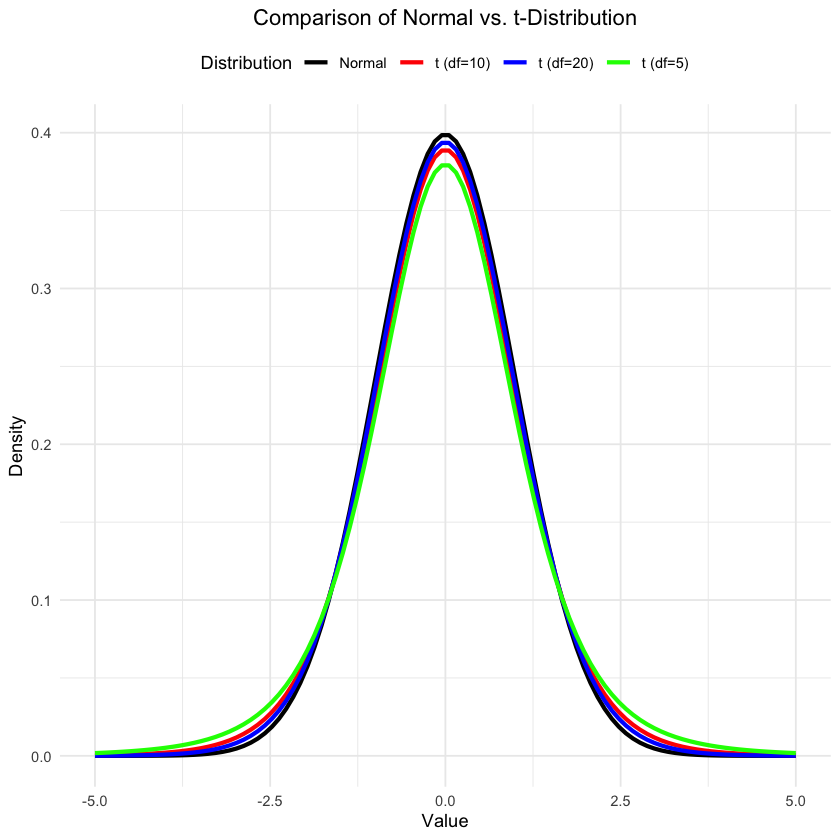

In [65]:
# Load necessary library
library(ggplot2)

# Define x-axis range
x <- seq(-5, 5, length.out = 100)

# Compute density for Normal distribution
normal_density <- dnorm(x, mean = 0, sd = 1)

# Compute density for t-distributions with different degrees of freedom
df_values <- c(5, 10, 20)  # Different degrees of freedom
t_densities <- lapply(df_values, function(df) dt(x, df = df))

# Create a data frame for ggplot
data <- data.frame(
  x = rep(x, times = length(df_values) + 1),
  density = c(normal_density, unlist(t_densities)),
  Distribution = factor(rep(c("Normal", paste0("t (df=", df_values, ")")), each = length(x)))
)

# Plot in the center of Jupyter Notebook
options(jupyter.plot_mimetypes = "image/png")  # Ensures proper rendering in Jupyter

ggplot(data, aes(x = x, y = density, color = Distribution)) +
  geom_line(size = 1.2) +
  theme_minimal() +
  labs(title = "Comparison of Normal vs. t-Distribution",
       x = "Value",
       y = "Density") +
  scale_color_manual(values = c("black", "red", "blue", "green")) +
  theme(legend.position = "top",
        plot.title = element_text(hjust = 0.5))  # Centers the title


> Example: A sample of 50 potato chip bags has a mean weight of **198g** and a sample standard deviation of **10g**.  
> A **95% confidence interval** for the population mean weight is:

$$
198 \pm (1.96 \times \frac{10}{\sqrt{50}})
$$

$$
198 \pm 2.77
$$

$$
(195.23, 200.77)
$$

This means we are **95% confident** that the true mean weight is between **195.23g and 200.77g**.

---

### 2.2. Practical Implementation in R
#### Compute Sample Mean (Point estiamte)

In [66]:
set.seed(123)
sample_data <- rnorm(30, mean = 50, sd = 10)
sample_mean <- mean(sample_data)
cat("Sample Mean:", sample_mean)

Sample Mean: 49.52896

In [67]:
t.test(x = sample_data, conf.level = 0.95)


	One Sample t-test

data:  sample_data
t = 27.653, df = 29, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 45.86573 53.19219
sample estimates:
mean of x 
 49.52896 


> **Interpretation**: We are 95% Confident that the true mean lies in between 45.87 and 53.19. 

### 2.3. Understnding the Confidence Interval

**Understanding a 95% Confidence Interval**: When we say “we are 95% confident that the interval actually contains the true value of the population parameter,” it means that:

- If we repeatedly take multiple random samples of a given size from the population, and for each sample, we construct a confidence interval, then approximately 95% of these confidence intervals will contain the true population parameter.
- We have only one sample, which produces a single confidence interval which is one of those. As a result, we say we are 95% confident that the true population value lies within this interval.
- This does not mean that a single confidence interval has a 95% probability of containing the true parameter—rather, it means that in repeated sampling, 95% of such intervals would capture the true value.
  

#### Summary Table

| Concept                  | Formula                                      | Explanation                                   |
|--------------------------|----------------------------------------------|-----------------------------------------------|
| **Sample Mean** ($\bar{x}$)  | $\bar{x} = \frac{\sum X_i}{n}$  | The average of the sample data. |
| **Standard Error (SE)**  | $SE = \frac{s}{\sqrt{n}}$  | Measures variability in the sample mean. |
| **Confidence Interval (CI)**  | $\bar{x} \pm t_{\alpha/2} \cdot SE$  | Provides a range for estimating the population mean. |
|**In R** | t.test(x=data, conf.level = 0.95)| Provides the 95% Confidence interval estimate of mean.|

---

### 2.4. Confidence Level and Critical Value
The confidence level is linked to the **critical value** ($z_{\alpha/2}$ or $t_{\alpha/2, df}$), which is the number of standard errors away from the mean.

**Common Confidence Levels and Their Critical Values**
| Confidence Level | $\alpha$ | $z_{\alpha/2}$ (Normal) |  $t_{\alpha/2, df}$ (unknow $\sigma$) |
|-----------------|-------------|------------------|-------------------|
| 90%            | 0.10        | 1.645            | Depends on df     |
| 95%            | 0.05        | 1.960            | Depends on df     |
| 99%            | 0.01        | 2.576            | Depends on df     |

---
---

# 3. Hypothsis Testing for Mean using One Sample and Two Samples

**Introduction**

This tutorial will guide you through the concepts and implementation of **one-sample z-test**, **one-sample t-test**, **independent sample t-test**, and **paired t-test** in R. We will also discuss their assumptions, Type I and Type II errors, and how statistical tests make sense in hypothesis testing.

**Hypothsis Testing**: A statistical procedure of testing a claim about population parameters. 
A test of hypothesis consists of two parts:

- **Null hypothesis ($𝑯_𝟎$)**:
    - A statement about a population parameter stating that the parameter is equal to some given reference value.
    - It is assumed true until there is sufficient evidence to reject it.

- **Alternative hypothesis ($𝑯_𝟏 or 𝑯_𝑨$)**:
    - A statement that the population parameter differs from the null hypothesis.
    - It reflects what you are trying to prove or provide evidence for.
---

## 3.1 **Key Points of Hypothesis Testing**

- **Null Hypothesis ($H_0$):**
    - Represents the default or expected claim.
    - States that there is no effect, no difference, or no relationship.
    - **Example:** $H_0: \mu = \mu_0$ (The population mean $\mu$ is equal to a specific value $\mu_0$).

- **Alternative Hypothesis ($H_1$):**
    - Represents the opposite of the null hypothesis.
    - Reflects the claim or effect we are trying to find evidence for.
    - **Example:** $H_1: \mu \neq \mu_0$ (The population mean $\mu$ is not equal to $\mu_0$).

- **Sample Data:**
    - Provides the evidence used to evaluate the hypotheses.
    - Collected from the population of interest.

- **Test Statistic:**
    - A calculated value (e.g., z-score, t-score) based on the sample data, assuming the null hypothesis is true.
    - Measures how far the sample result is from the null hypothesis.

- **Hypothesis Test:**
    - Since the sample statistic varies, it is normal to observe values different from what is expected under the null hypothesis.
    - A hypothesis test determines whether the test statistic is consistent with the null hypothesis.
    - Null hypothesis is rejected if the observed data produces an extreme value that is unlikely under the null hypothesis.
    - A significance level ($\alpha$) (e.g., 0.05) is used as a threshold to decide whether to reject $H_0$.
    - If the test statistic falls in the critical region (or if the p-value < $\alpha$), we reject $H_0$.
    - We can visualize this idea through the sampling distribution: for $\alpha = 0.05$, 95% of values are considered usual for null being true, while 5% are unsual (or extreme) for null. If our data produces a test statistic within this 5% extreme region, we reject the null hypothesis.

- **Simplified Workflow:**
     - 1. State $H_0$ and $H_1$.
     - 2. Collect sample data.
     - 3. Calculate the test statistic.
     - 4. Compare the test statistic to the critical value or compute the p-value.
     - 5. Make a decision: If p-value < $\alpha$, Reject $H_0$ or othewise fail to reject $H_0$.
---

## 3.2 Hypothesis Testing: 
While conducting hypothesis testing, our main focus is to compare parameter values. These comparisons are primarily based on the claims made about the parameters, which lead to three types of tests.

- **Two-Tailed Test**
    - **Scenario:** The mean ACT score is claimed to be 19.85. We want to test if the mean differs from 19.85.
        - **Null Hypothesis (H₀):** \$ \mu = 19.85 \$
        - **Alternative Hypothesis (Hₐ):** \$ \mu \neq 19.85 \$

- **Left-Tailed Test**
    - **Scenario:** Customers have reported that the protein bars contain less protein than the advertised **20 grams**.
        - **Null Hypothesis (H₀):** \$ \mu \geq 20 \$
        - **Alternative Hypothesis (Hₐ):** \$ \mu < 20 \$

- **Right-Tailed Test**
    - **Scenario:** The miles per gallon (MPG) of a newly developed car is claimed to be greater than **50**.
        - **Null Hypothesis (H₀):** \$ \mu \leq 50 \$
        - **Alternative Hypothesis (Hₐ):** \$ \mu > 50 \$
---

## 3.3. One-Sample Z-Test vs One-Sample T-Test

- **When to Use:**
    - **One-Sample Z-Test**: Used when you want to compare the mean of a sample to a known population mean, and the **population standard deviation is known**.
    - **One-Sample T-Test**: Used when the **population standard deviation is unknown**, and you estimate it using the **sample standard deviation**.

- **Assumptions:**
    - The data is normally distributed (or approximately normal for large sample sizes).
    - Observations are independent.
    - For the **z-test**, the **population standard deviation must be known** (very unusual case because we do not know it).

## 3.4. Type I and Type II Errors in Hypothesis Testing

In hypothesis testing, errors can occur when making decisions about the null hypothesis ($H_0$). These errors are classified into **Type I** and **Type II** errors.

---

- **1. Type I Error (False Positive)**
    - **Definition**: A **Type I error** occurs when we **reject the null hypothesis ($H_0$) when it is actually true**.  
    - **Consequence**: We conclude that there is an effect or difference when, in reality, none exists.  
    - **Significance Level ($\alpha$)**: The probability of making a Type I error is denoted by **$\alpha$** (commonly set at **0.05** or **5%**).  
    >- **Example**: A **medical test** wrongly detects a disease in a healthy person, where null is no diseses, alternative: disease is possible 


---

- **2. Type II Error (False Negative)**
    - **Definition**: A **Type II error** occurs when we **fail to reject the null hypothesis ($H_0$) when it is actually false**.  
    - **Consequence**: We fail to detect an effect or difference that actually exists.  
    - **Probability ($\beta$)**: The probability of making a Type II error is denoted by **$\beta$**.  
    >- **Example**: A **medical test** fails to detect a disease in a person who actually has it.  

> *Real-life analogy*: A **fire alarm** not going off when there **is a fire**.

---

- **Key Differences Between Type I and Type II Errors**

| Error Type  | What Happens? | Reality | Probability | Example |
|------------|--------------|---------|-------------|---------|
| **Type I Error**  | Reject $H_0$ when it is true | No real effect exists | $\alpha$ (False Positive Rate) | Convicting an innocent person |
| **Type II Error** | Fail to reject $H_0$ when it is false | A real effect exists | $\beta$ (False Negative Rate) | Letting a guilty person go free |

---

- **Balancing Type I and Type II Errors**
    - Lowering **$\alpha$ (Type I error rate)** makes it harder to reject $H_0$, increasing the chance of a **Type II error**.
    - Reducing **$\beta$ (Type II error rate)** increases the test's **power**, making it easier to detect real effects but increasing the risk of **Type I errors**.
    - The balance depends on the context—**medical tests** prioritize reducing **Type II errors**, while **legal trials** prioritize minimizing **Type I errors**.

---

**Note:** Understanding Type I and Type II errors is crucial for designing robust hypothesis tests and making informed statistical decisions.


### Implementation in R (One-Sample Z-Test)

In [19]:
# Custom function for One-Sample Z-Test
z_test <- function(sample_mean, mu0, pop_sd, n, alternative) {
    #@ alternative_type = c("two.sided", "less", "greater")
  z_score <- (sample_mean - mu0) / (pop_sd / sqrt(n))
    if ("alternative" == "two.sided") p_value <- 2 * pnorm(-abs(z_score)) # two-tailed test
    else if ("alternative" == "less") p_value <- pnorm(z_score) # left-tailed test
    else p_value <- pnorm(z_score) # right-tailed test
    
  return(list(z_score = z_score, p_value = p_value))
}

- **Example 1 (One Sample Z-test):**
>**Scenario:** Suppose scores on exams in Statistics are normally distributed and standard deviation is assumed as 3 points. A random sample of 32 scores is taken and observed as
>sample data = c(64,68,69,69,69,69,69,70,71,71,72,72,72,72,72,73,73,73,74,74,74,74,74,75,76,76,77,77,77,77,77,79).
>If a mean test score below 75 is considered poor student performance, do you think the students' performance qualifies as poor based on the given data? Make your decision based on significance level α=0.01.

In [40]:
# z-test Implementation in R 
sample_data = c(64,68,69,69,69,69,69,70,71,71,72,72,72,72,72,73,73,73,74,74,74,74,74,75,76,76,77,77,77,77,77,79)
n <- length(sample_data)
sample_mean <- mean(sample_data)
list('Sample_mean' =sample_mean, 'sample_size' = n)


$Sample_mean
[1] 72.78125

$sample_size
[1] 32

**Tets of Hypothesis**: We want to test whether mean test score is below 75.

- Null Hypothesis ($H_0$): \$ \mu \geq 75 \$ | (can be written as \$ \mu = 75 \$)
- Alternative Hypothesis ($H_a$): \$ \mu < 75 \$

In [21]:
# One-Sample z-Test
z_test(sample_mean = sample_mean, mu0 = 75, pop_sd = 3, n = 32, alternative = "less")


$z_score
[1] -4.183715

$p_value
[1] 1.433917e-05

>**Test Conclusion**: We obtained $p-value = 0.000014$ which is less than the significance level $\alpha = 0.01$. Therefore, we reject the null hypothesis. This indicates that the sample data provides strong evidence supporting that the mean test score is below 75, suggesting that students' performance qualifies as poor.

---

- **Example 2 (One Sample T-test) :**
> **Scenario:** A pharmaceutical company claims that its new weight-loss pill helps users lose an average of 10 pounds over a 12-week period. To verify this claim, a consumer advocacy group conducts an independent study to test whether the average weight loss differs from the company’s claim. They randomly select 28 participants who take the pill for 12 weeks and record their weight loss (in pounds)  as
> 
> c(5.9,7.5,12.5,11.9,9.1,9.7,9.9,9.3,12.4,9.1,10.7,10.5,5.7,8.0,9.1,11.1,8.2,10.7,9.2,9.8,11.3,8.5,10.2,7.0,9.9,8.9,11.7,7.8)
> Test whether the average weight loss differs from the company’s claim, use $\alpha = 0.05$. 

In [36]:
weight_loss = c(5.9,7.5,12.5,11.9,9.1,9.7,9.9,9.3,12.4,9.1,10.7,10.5,5.7,8.0,9.1,11.1,8.2,10.7,9.2,9.8,11.3,8.5,10.2,7.0,9.9,8.9,11.7,7.8)
n <- length(weight_loss)
sample_mean <- mean(weight_loss)
sample_sd <- sd(weight_loss)
list('Sample_mean' =sample_mean, 'sample_size' = n, 'sample_sd' = sample_sd)

$Sample_mean
[1] 9.485714

$sample_size
[1] 28

$sample_sd
[1] 1.775077

**Tets of Hypothesis**: whether the average weight loss differs from the company’s claim 10 lbs.

- Null Hypothesis ($H_0$): \$ \mu = 10 \$ 
- Alternative Hypothesis ($H_a$): \$ \mu \neq 10 \$

In [38]:
# One-Sample t-Test
t.test(x = weight_loss, mu = 10, alternative = "two.sided")


	One Sample t-test

data:  weight_loss
t = -1.5331, df = 27, p-value = 0.1369
alternative hypothesis: true mean is not equal to 10
95 percent confidence interval:
  8.797411 10.174017
sample estimates:
mean of x 
 9.485714 


>**Test Conclusion**: Since the p-value of $0.1369$ is greater than the significance level $\alpha = 0.05$, we do not reject the null hypothesis. This suggests that there is insufficient evidence to refuse the company's claim that the new weight-loss pill helps users lose an average of 10 pounds over a 12-week period.
---

## 3.4. Independent Sample T-Test (Two Sample Scenario)

- **When to Use:**
    - Used to compare the **means of two independent or unrelated groups**, or
    - Applied when examining the effect of a binary variable on a quantitative response variable.


- **Assumptions:**
    - The data in each group is **normally distributed**.
    - The **variances of the two groups are equal** (homogeneity of variance).
    - Observations are **independent** within and between groups.

- **Hypotheses:**
    - **Null Hypothesis (H0)**: The means of the two groups are equal.
    - **Alternative Hypothesis (H1)**: The means of the two groups are not equal.
    - If the means are equal, it implies that both groups have the same effect on the response variable.

- **Example 3 (Two Sample T-test):** 
> A company wants to test whether their new training program improves employee productivity compared to the old program. They randomly select two independent groups of employees. After training, they measure the number of tasks completed by each employee.
> 
> Old Training Program ($n_1 = 10$): 20, 22, 25, 23, 19, 18, 21, 24, 22, 20
>
>New Training Program ($n_2 = 12$): 26, 28, 30, 27, 25, 29, 31, 30, 28, 27, 26, 30
>

>**Tets of Hypothesis**: We want to test whether their new training program improves employee productivity compared to the old program.
>That is old mean productivity score is less than  new mean productivity score (This goes to alternative). 

- Null Hypothesis ($H_0$): \$ \mu_1 \geq \mu_2 \$ 
- Alternative Hypothesis ($H_a$): \$ \mu_1 < \mu_2 \$

In [41]:
### Implementation in R:
#two independent samples
group1 <- c(20, 22, 25, 23, 19, 18, 21, 24, 22, 20)
group2 <- c(26, 28, 30, 27, 25, 29, 31, 30, 28, 27, 26, 30)

# Independent Sample T-Test
t.test(group1, group2, var.equal = TRUE, alternative = "less")


	Two Sample t-test

data:  group1 and group2
t = -7.5574, df = 20, p-value = 1.388e-07
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -5.158084
sample estimates:
mean of x mean of y 
 21.40000  28.08333 


>**Test Conclusion**: Since the p-value of $1.388*10^{-07}$ is less than the significance level $\alpha = 0.05$, we reject the null hypothesis. This suggests that there is sufficient evidence to support the company's claim that new training program improves employee productivity compared to the old program. 
---

- **Testing the claim using Confidence Interval**
    - If **0** is included in the interval, then the difference is $\textbf{not significant}$ (fail to reject $H_0$).
    - If both the $\textbf{lower limit and upper limit are negative}$, it indicates a $\textbf{significant difference}$, supporting $\mu_1 < \mu_2$.
    - If both the $\textbf{lower limit and upper limit are positive}$, it indicates a $\textbf{significant difference}$, supporting $\mu_1 > \mu_2$.

> The above T-test rsult shows the confidence interval as (-Inf,  -5.158084)
>
> That means $-\infty <\mu_1 -\mu_2 < -5.158084$
> 
> Since confidence interval entirely contains negative valeus, $\mu_1 -\mu_2< 0 \implies \mu_1 < \mu_2$ is reasonable.  

## 3.5. Paired Sample T-Test

- **When to Use:**
    - Used to compare the means of **two related groups** (e.g., **before-and-after** measurements).

- **Assumptions:**
    - The **differences between pairs** are normally distributed.
    - Observations are **paired and dependent**.

- **Hypotheses:**
    - **Null Hypothesis (H0)**: The mean difference between pairs is zero, $\mu_d = 0$
    - **Alternative Hypothesis (H1)**: The mean difference between pairs is not zero, $\mu_d \neq (\text{or}\: <\: \text{or} >) 0$

- **Example 4 (Paired sample t-test)**:
A fitness coach wants to determine if a new diet plan significantly impacts weight loss. He records the weights of 16 individuals before and after the diet program as follows:
    - Before: (3.7,4.3,3.5,4.6,3.7,4.5,3.7,4.1,3.3,3.7,4.4,4.4,3.5,5.0,3.7,4.4)
    - After: (3.9,3.4,3.7,2.9,4.0,3.7,3.2,4.2,4.0,4.0,3.6,3.9,3.6,3.9,4.2,4.2)

- **Hypotheses:** We want to test whether new diet plan is effective in weight loss. 
    - **Null Hypothesis (H0)**: The mean difference between pairs is zero, $\mu_d = 0$ (no effecteive)
    - **Alternative Hypothesis (H1)**: New diet plan is effective, $\mu_d > 0$

In [47]:
### Implementation in R:
before <- c(3.7,4.3,3.5,4.6,3.7,4.5,3.7,4.1,3.3,3.7,4.4,4.4,3.5,5.0,3.7,4.4)
after <- c(3.9,3.4,3.7,2.9,4.0,3.7,3.2,4.2,4.0,4.0,3.6,3.9,3.6,3.9,4.2,4.2)
# Paired Sample T-Test
t.test(before, after, paired = TRUE, alternative = "greater")


	Paired t-test

data:  before and after
t = 1.5337, df = 15, p-value = 0.07296
alternative hypothesis: true mean difference is greater than 0
95 percent confidence interval:
 -0.03664092         Inf
sample estimates:
mean difference 
        0.25625 


>**Test Conclusion**: Since the p-value of $0.07296$ is greater than the significance level $\alpha = 0.05$, we fail to reject the null hypothesis. Therefore, the data does not provide sufficient evidence to conclude that the new diet plan has a significant impact on weight loss.
---

## 4. How Statistical Tests Make Sense
Statistical tests help us make **inferences** about populations based on sample data. Here's how they make sense:

- **Hypothesis Testing Framework:**
    - We start with a **null hypothesis (H0)** and an **alternative hypothesis (H1)**.
    - We calculate a **test statistic** (e.g., z-score, t-score) that measures how far our sample statistic is from the null hypothesis.
    - We compare the **test statistic** to a **critical value** or calculate a **p-value** to determine whether to reject $( H_0 )$.

**P-Value:**
    - The **p-value** is the **probability of obtaining a test statistic as extreme as (or more extreme than) the observed one, assuming $ H_0 $ is true**.
    - A **small p-value** (e.g., < 0.05) suggests that the observed data is unlikely under $H_0 $., so we reject $H_0$.

- **Type I and Type II Errors:**
    - Balancing these errors is crucial. A **lower significance level (e.g., 0.01)** reduces Type I errors but increases Type II errors, and vice versa.

**Assumptions:**
    - Violations of assumptions (e.g., **non-normality, unequal variances**) can lead to incorrect conclusions. Always check assumptions before performing tests.

## 5. Summary of Tests

| **Test**                | **Use Case**                                      | **Assumptions**                    | **R Function**         |
|-------------------------|--------------------------------------------------|-------------------------------------|-------------------------|
| One-Sample Z-Test      | Compare sample mean to known value     | Known population standard deviation | Custom function        |
| One-Sample T-Test      | Compare sample mean to known value       | Unknown population standard deviation | `t.test()`           |
| Independent T-Test     | Compare means of two independent groups          | Normality, equal variances         | `t.test()`            |
| Paired T-Test         | Compare means of two related groups               | Normality of differences           | `t.test(paired=TRUE)` |

---
- **Practical Tips**
    - **Always visualize your data** (e.g., histograms, boxplots) to check assumptions.
    - **Use non-parametric tests** (e.g., Wilcoxon test) if assumptions are violated.
    - **Report effect sizes** (e.g., Cohen's d) alongside p-values for practical significance.
---
---


## 4. How Statistical Tests Make Sense
Statistical tests help us make **inferences** about populations based on sample data. Here's how they make sense:

### Hypothesis Testing Framework:
- We start with a **null hypothesis (H0)** and an **alternative hypothesis (H1)**.
- We calculate a **test statistic** (e.g., z-score, t-score) that measures how far our sample statistic is from the null hypothesis.
- We compare the **test statistic** to a **critical value** or calculate a **p-value** to determine whether to reject $ H_0 $.

### P-Value:
- The **p-value** is the **probability of observing the data (or something more extreme) if $ H_0 $ is true**.
- A **small p-value** (e.g., < 0.05) suggests that the observed data is unlikely under $ H_0 $, so we reject $ H_0 $.

### Type I and Type II Errors:
- Balancing these errors is crucial. A **lower significance level (e.g., 0.01)** reduces Type I errors but increases Type II errors, and vice versa.

### Assumptions:
- Violations of assumptions (e.g., **non-normality, unequal variances**) can lead to incorrect conclusions. Always check assumptions before performing tests.

## 5. Summary of Tests

| **Test**                | **Use Case**                                      | **Assumptions**                    | **R Function**         |
|-------------------------|--------------------------------------------------|-------------------------------------|-------------------------|
| One-Sample Z-Test      | Compare sample mean to known population mean     | Known population standard deviation | Custom function        |
| One-Sample T-Test      | Compare sample mean to known population mean     | Unknown population standard deviation | `t.test()`           |
| Independent T-Test     | Compare means of two independent groups          | Normality, equal variances         | `t.test()`            |
| Paired T-Test         | Compare means of two related groups               | Normality of differences           | `t.test(paired=TRUE)` |

## 6. Practical Tips
- **Always visualize your data** (e.g., histograms, boxplots) to check assumptions.
- **Use non-parametric tests** (e.g., Wilcoxon test) if assumptions are violated.
- **Report effect sizes** (e.g., Cohen's d) alongside p-values for practical significance.

By understanding these tests and their assumptions, you can make **informed decisions** about your data and avoid common pitfalls in statistical analysis.